<a href="https://colab.research.google.com/github/carllosryan/data-driven-insights/blob/main/MiniProjeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini Projeto: Data-Driven Insights (Módulo 01)**

O projeto é um exercício prático para explorar, transformar e visualizar dados usando Python no Google Colab.
O objetivo é gerar insights descritivos a partir da análise de um conjunto de dados CSV, utilizando bibliotecas pandas, numpy e matplotlib, além de estruturas básicas de Python como listas, dicionários, tuplas, condicionais e loops.

A base de dados utilizada oara o projeto foi: Student Performance.
Esses dados referem-se ao desempenho de alunos do ensino secundário em duas escolas portuguesas, abrangendo características demográficas, sociais, escolares e notas em Matemática e Português. Os conjuntos de dados incluem as notas do 1º período (G1), 2º período (G2) e a nota final (G3). Entretanto, foi utilizado nessa construção somente a base de dados de notas na disciplina em matemática.

Por Carlos Ryan

### 1. Instalação e importação das bibliotecas: Pandas, Numpy e Matplotlib

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install numpy


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Carregando a base de dados negrito

In [2]:
Notas_mat=pd.read_csv('student-mat.csv', sep=";") #notas em matematica

## 3. Leituras iniciais da base

In [178]:
print("Número de linha e colunas", Notas_mat.shape) #qtd de linhas e colunas mat
print(Notas_mat.head()) #Primeiras 5 linhas do df Matemática

Número de linha e colunas (395, 36)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  Dalc Walc  health  absences  G1  G2  G3 DiferencaNotas DiferencaNotas_1e2  \
0    1    1       3         6   5   6   6              1                  1   
1    1    1       3         4   5   5   6              0                  0   
2    2    3       3        10   7   8  10              1                  1   
3    1    1       5         2  15  14  15             -1                 -1   
4    1    2       5         4   6  10  10              4                  4   

  

### 3.1 Colunas e seus respectivo tipo de dado

In [4]:
#Colunas da base de notas em matemática e o seu respectivo tipo
'''for colunas in Notas_mat.columns:
  print(f"Coluna: {colunas}    Tipo: {Notas_mat[colunas].dtype}")'''
print(Notas_mat.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object




*   Ao verificar as 5 primeiras linhas da base, não foi possivel encontrar possiveis insights, pois a base se mostra bastante homogêna.
*  Sendo assim, foi usado o .head(15) para verificar mais informações.



In [30]:
print(Notas_mat.head(15)) #15 linhas

   school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0      GP   F   18       U     GT3       A     4     4   at_home   teacher   
1      GP   F   17       U     GT3       T     1     1   at_home     other   
2      GP   F   15       U     LE3       T     1     1   at_home     other   
3      GP   F   15       U     GT3       T     4     2    health  services   
4      GP   F   16       U     GT3       T     3     3     other     other   
5      GP   M   16       U     LE3       T     4     3  services     other   
6      GP   M   16       U     LE3       T     2     2     other     other   
7      GP   F   17       U     GT3       A     4     4     other   teacher   
8      GP   M   15       U     LE3       A     3     2  services     other   
9      GP   M   15       U     GT3       T     3     4     other     other   
10     GP   F   15       U     GT3       T     4     4   teacher    health   
11     GP   F   15       U     GT3       T     2     1  services


*   Verificando possivel correlação entre as horas de estudo e a notas final serem maiores ou igual a 14, tendo em vista que essa nota se configura como uma situação de "Bom" para o aluno.




In [179]:
#Verificando possivel relação entre horas de estudo com notas maiores que 14
print(Notas_mat['studytime'][Notas_mat['G3'] >= 14])

3      3
5      2
8      2
9      2
14     3
      ..
363    2
374    3
376    3
378    2
391    1
Name: studytime, Length: 73, dtype: int64




*   Conforme a análise anterior, foi visto nessa parte as variáves sociodemográficas dos alunos que obtiveram notas maisores ou iguais a 14.
*   Além disso, foi visto como se compoe as notas dos alunos que estão localizados na zona Rural.



---


*   Na análise, pode ser verificar que alunos da zona rural possui mais horas de estudo, com mais resultados em 3. Sendo, 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas ou 4 - >10 horas.

*   Além disso, a maioria dos alunos em situção de 'bom', são do sexo masculino








In [34]:
#Alunos com nota maior ou igaul a 14 e as suas características sociodemográficas
print(Notas_mat.loc[Notas_mat['G3'] >= 14, ['sex','address','studytime', 'G3']])
print(Notas_mat.loc[Notas_mat['address'] == 'R', ['sex','address','studytime', 'G3']]) # Alunos da zona rural



    sex address  studytime  G3
3     F       U          3  15
5     M       U          2  15
8     M       U          2  19
9     M       U          2  15
12    M       U          1  14
..   ..     ...        ...  ..
374   F       R          3  19
376   F       U          3  15
378   F       U          2  15
380   M       U          2  14
391   M       U          1  16

[100 rows x 4 columns]
    sex address  studytime  G3
24    F       R          3   8
32    M       R          2  16
37    M       R          3  15
38    F       R          3  11
39    F       R          1  13
..   ..     ...        ...  ..
385   F       R          3  10
386   F       R          1   6
387   F       R          3   0
392   M       R          1   7
393   M       R          1  10

[88 rows x 4 columns]


###4. Listas, Tuplas e Dicionário



*   Utilizou-se de lista para verificar os trabalhos dos pais desses alunos
*   Dicionário para apontar as profissões dos dois juntos.


---


*   Evidenciou-se que existem mais mães que trabalham em casa em relação aos pais. Enquanto isso, os pais trabalham em "outros" trabalhos.






In [181]:
# Lista: Trbalahos da mãe e do pai
trabalhoM = list(Notas_mat['Mjob'])
print("Mãe:")
for job in trabalhoM[:5]:
    print(job)
print(40*"-")
print("Pai:")
trabalhoP = list(Notas_mat['Fjob'])
for job in trabalhoP[:5]:
    print(job)

# Dicionário com o trabalho da mãe e o do pai
dicionarioMae = dict(zip(Notas_mat['Mjob'][:6], Notas_mat['Fjob'][:6]))
dicionarioPai = dict(zip(Notas_mat['Fjob'][:6], Notas_mat['Fedu'][:6]))
print(dicionarioMae, dicionarioPai)


# Tupla- informações de uma linha
linha0 = Notas_mat.iloc[0]
tuplal1= (linha0['address'],linha0['Mjob'],linha0['Fjob'], linha0['G3'])
print(tuplal1)

Mãe
at_home
at_home
at_home
health
other
----------------------------------------
Pai
teacher
other
other
services
other
{'at_home': 'other', 'health': 'services', 'other': 'other', 'services': 'other'} {'teacher': 4, 'other': 3, 'services': 2}
('U', 'at_home', 'teacher', np.int64(6))


### 5. Utilizando estruturas de repetição


*   Utilzou-se um 'for' para determinar a situação dos alunos em relação a nota final nas seguintes categorias: Reprovado, Suficiente, Satisfatório, Bom e Excelente.
Alem disso, foi calaculado a quantidade de alunos em duas categorias: Bom e Excelentes.
*   Um 'while' para verificar a qual o primeiro aluno em Excelente.


*   E a média das 3 notas para cada aluno.


---


*   Segundo a análise, existe uma minoria de alunos acima de bons, sendo somente 100, e reprovados é ainda maior, sendo 130 alunos.





In [182]:
#categorizando os alunos de acordo com a nota final G3
nota1 = list(Notas_mat['G1'])
nota2 = list(Notas_mat['G2'])
nota3 = list(Notas_mat['G3'])
situacao = []
qtd_ruins=0
qtd_bons=0
qtd_exe=0
qtd_repr=0
for i in nota3:
    if i <= 9:
      #print("Situação do aluno: Reprovado")
      situacao.append('Reprovado')
      qtd_repr += 1
      qtd_ruins += 1
    elif i >= 10 and i <= 11 :
      #print("Situação do aluno: Suficiente")
      situacao.append('Suficiente')
      qtd_ruins += 1
    elif i>= 12 and i <= 13:
      #print("Situação do aluno: Satisfatório")
      situacao.append('Satisfatório')
      qtd_ruins += 1
    elif i >= 14 and i <= 15:
      #print("Situação do aluno: Bom")
      situacao.append('Bom')
      qtd_bons += 1
    else:
      #print("Situação do aluno: Excelente")
      situacao.append('Excelente')
      qtd_bons += 1
print(situacao[:5]) #Situação dos primeiros 5 alunos
print(40*"=")
print(f"Quantidade de alunos abaixo do bom: {qtd_ruins}")
print(f"Quantidade de alunos entre bons e excelentes: {qtd_bons}")
print(f"Quantidade de alunos com nota reprovados: {qtd_repr}")

print(40*"=")
#medias de notas por aluno
soma = 0
media=[]
for i in range(len(nota1)):
    soma += nota1[i] + nota2[i] + nota3[i]
    media.append(f'{soma/3:.4f}')
    soma = 0
for i in media[:5]:
  print(f"A media do Aluno é: {i}")

print(40*"=")
# While: Encontrando a primira nota de excelencia em matemática
notamax = 16  # nota de excelência
i = 0
while i < len(nota3) and nota3[i] <= notamax:
    i += 1
if i == len(nota3):
  print("O primeiro aluno excelente, com nota igual a", notamax,"foi encontrado com nota:", nota3[i])
if i < len(nota3):
  print("O primeiro aluno excelente, com nota maior que", notamax, "foi encontrado com nota:", nota3[i])
else:
  print("Nenhum aluno esteve em excelência, com notas iguias ou superiores a", notamax, "na disciplina de matemática")

['Reprovado', 'Reprovado', 'Suficiente', 'Bom', 'Suficiente']
Quantidade de alunos abaixo do bom: 295
Quantidade de alunos entre bons e excelentes: 100
Quantidade de alunos com nota reprovados: 130
A media do Aluno é: 5.6667
A media do Aluno é: 5.3333
A media do Aluno é: 8.3333
A media do Aluno é: 14.6667
A media do Aluno é: 8.6667
O primeiro aluno excelente, com nota maior que 16 foi encontrado com nota: 19


### 6. Alguns cálculos


*   A ideia dessa analise foi verificar as difrenças entre as 3 notas, podendo evidenciar o esforço do aluno
*   Nesse caso, alunos de obtiveram uma diferença negativa entre as suas primieras 2 notas, conseguiram elevar na nota 3. Entretanto, ainda tiveram alunos com direferença negativa da nota 2 para a nota 3.



In [185]:
#Diferença entre as notas 1, 2 e 3 em matemática
if 'G1' in Notas_mat.columns and 'G2' in Notas_mat.columns and 'G3' in Notas_mat.columns:
  Notas_mat['DiferencaNotas_1e2'] = Notas_mat['G2'] - Notas_mat['G1']
  Notas_mat['DiferencaNotas_2e3'] = Notas_mat['G3'] - Notas_mat['G2']
  print(Notas_mat[['G1','G2','G3', 'DiferencaNotas_1e2','DiferencaNotas_2e3']].head(20))


    G1  G2  G3  DiferencaNotas_1e2  DiferencaNotas_2e3
0    5   6   6                   1                   0
1    5   5   6                   0                   1
2    7   8  10                   1                   2
3   15  14  15                  -1                   1
4    6  10  10                   4                   0
5   15  15  15                   0                   0
6   12  12  11                   0                  -1
7    6   5   6                  -1                   1
8   16  18  19                   2                   1
9   14  15  15                   1                   0
10  10   8   9                  -2                   1
11  10  12  12                   2                   0
12  14  14  14                   0                   0
13  10  10  11                   0                   1
14  14  16  16                   2                   0
15  14  14  14                   0                   0
16  13  14  14                   1                   0
17   8  10

### 7. Arrays


*   A média das notas 3 foram de 10.41, evidenciando médias baixas que entram na categoria de Suficiente, e a mediana é 11, não se afastando da média dessas notas. O desvio padrão de 4.5 mostra que as notas são diversas.




In [145]:
array_g1= np.array(Notas_mat['G1']) #array de notas 1
array_g2= np.array(Notas_mat['G2']) #array de notas 2
array_g3= np.array(Notas_mat['G3']) #array de notas 3


mediag3 = np.mean(array_g3) # media
medianag3 = np.median(array_g3) #mediana
desviopg3 = np.std(array_g3) #desvio padrão
print(f"Média das notas 3: {mediag3}")
print(f"Mediana das notas 3: {medianag3}")
print(f"Desvio padrão das notas 3: {desviopg3}")

#Media manual
soma = array_g1 + array_g2 + array_g3
media = soma / 3

Média das notas 3: 10.415189873417722
Mediana das notas 3: 11.0
Desvio padrão das notas 3: 4.57563964146053


### 8. Acesso e Manipulação



*   Com o '.loc', procurou-se mostrar os alunos que são Excelentes, ou seja, com notas maiores ou iguais a 16 e algumas de suas características.

*   Denotou-se que a grande parte desses alunos são~do sexo masculino, e que a profissão da mãe se divide em 'Servicos' e 'professora'.



In [151]:
#As 3 notas dos primieros 5 alunos
print(Notas_mat.iloc[:5,30:33])
print(40*"=")
#As 3 notas dos ultimos 5 alunos
print(Notas_mat.iloc[-5:,30:33])
print(40*"=")
# Alunos com nota G3 maior ou igual a 16
alunos_exec = Notas_mat.loc[Notas_mat['G3'] >= 16, ['sex','address','Mjob', 'G1', 'G2', 'G3']]
print(alunos_exec)

   G1  G2  G3
0   5   6   6
1   5   5   6
2   7   8  10
3  15  14  15
4   6  10  10
     G1  G2  G3
390   9   9   9
391  14  16  16
392  10   8   7
393  11  12  10
394   8   9   9
    sex address      Mjob  G1  G2  G3
8     M       U  services  16  18  19
14    M       U     other  14  16  16
22    M       U   teacher  15  15  16
31    M       U  services  17  16  17
32    M       R   teacher  17  16  16
36    M       U   teacher  15  16  18
42    M       U  services  19  18  18
47    M       U    health  19  19  20
59    F       U  services  15  16  16
69    F       R     other  16  16  16
91    F       U  services  16  17  18
101   M       U  services  16  17  17
104   M       U  services  16  18  18
107   M       U  services  16  18  18
109   F       U    health  14  15  16
110   M       U   teacher  18  19  19
113   M       U   teacher  18  19  19
115   M       U   teacher  15  15  16
129   M       R   teacher  18  18  18
167   F       U    health  14  15  16
171   M       U     ot



*   Em localização, grande parte dos alunos são da zona urbana, 307, e poucos da rural, sendo 88.
*   208 alunos são do sexo feminino e 187 do sexo masculino

*  Analisando uma correlação, a partir do '.groupby', percebeu-se que as horas de estudo dos alunos é um fator contibuinte nas notas, porem a hora de estudo 3, ou seja, de 5 a 10 horas. Acima de 10 horas, as notas acabam sendo um pouco inferiores.






In [156]:
#Quantidade por localização: urbano e rural
localizacao = Notas_mat['address'].value_counts()
print(localizacao)
print(40*"=")
#Quantidade por sexo: feminino e masculino
sexo = Notas_mat['sex'].value_counts()
print(sexo)
print(40*"=")
#Horas de estudo e notas
hr_estudo = Notas_mat.groupby('studytime')[['G1', 'G2', 'G3']].mean()
print(hr_estudo)

address
U    307
R     88
Name: count, dtype: int64
sex
F    208
M    187
Name: count, dtype: int64
                  G1         G2         G3
studytime                                 
1          10.438095  10.276190  10.047619
2          10.651515  10.505051  10.171717
3          12.046154  11.507692  11.400000
4          11.888889  12.037037  11.259259


### 9. Gráficos

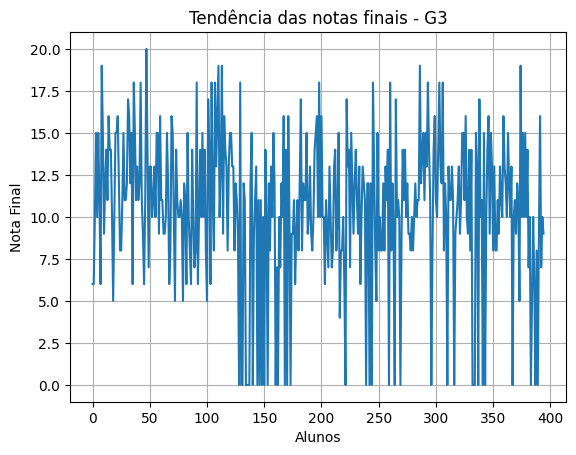

In [162]:
#Gráfico de linhas para as notas 3
plt.plot(Notas_mat.index, Notas_mat['G3'])
plt.title('Tendência das notas finais - G3')
plt.xlabel('Alunos')
plt.ylabel('Nota Final')
plt.grid(True)
plt.show()

O gráfico acima não mostrou uma tendência, apenas uma variação bem grande de notas. Entretanto, poucos alunos chegaram a nota maxima de 20, enquanto varios zeraram.

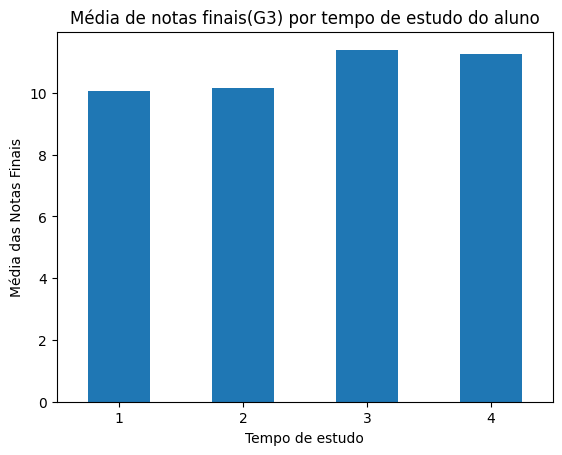

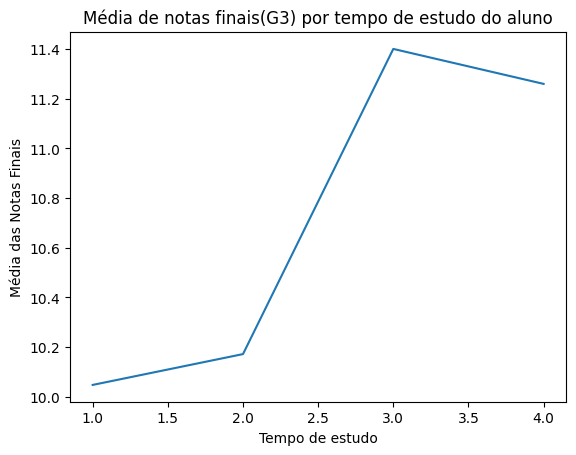

In [172]:
#Gráfico de barras entre horas de estudo e as notas
if 'G3' in Notas_mat.columns and 'studytime' in Notas_mat.columns:
    media_tempo = Notas_mat.groupby('studytime')['G3'].mean()
    media_tempo.plot(kind='bar')
    plt.title('Média de notas finais(G3) por tempo de estudo do aluno')
    plt.xlabel('Tempo de estudo')
    plt.ylabel('Média das Notas Finais')
    plt.xticks(rotation=0)
    plt.show()

#Gráfico de barras entre horas de estudo e as notas
if 'G3' in Notas_mat.columns and 'studytime' in Notas_mat.columns:
    media_tempo = Notas_mat.groupby('studytime')['G3'].mean()
    media_tempo.plot()
    plt.title('Média de notas finais(G3) por tempo de estudo do aluno')
    plt.xlabel('Tempo de estudo')
    plt.ylabel('Média das Notas Finais')
    plt.xticks(rotation=0)
    plt.show()

Os graficos acima evidenciam a correlação de tempo de estudos com a notas. Fica evidenciado, a partir do grafico, que as horas de estudo até 10 horas possui correlação postiva com notas. Acima de 10 horas de estudo, essas notas passam a sofrer déficits.

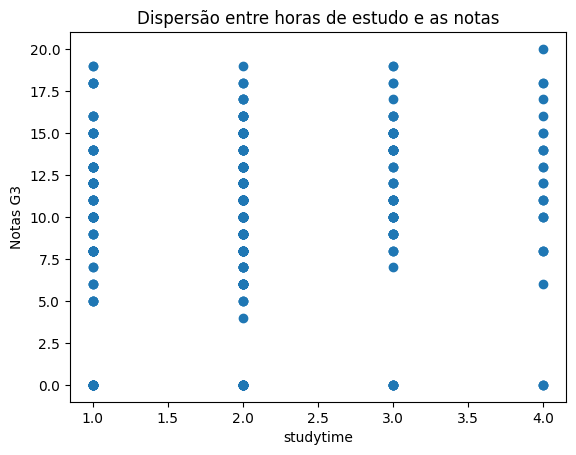

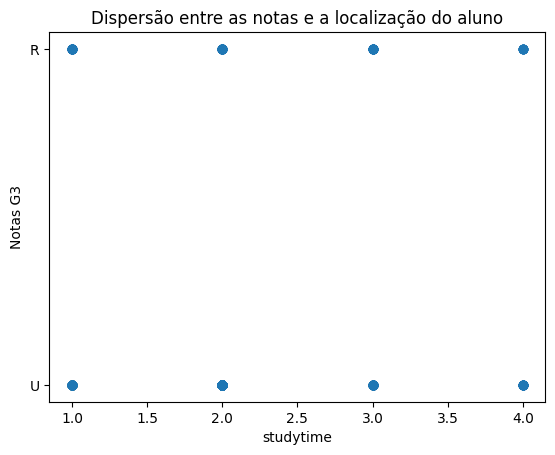

In [177]:
#Grafico de dispersão
if 'G3' in Notas_mat.columns and 'studytime' in Notas_mat.columns:
    plt.scatter(Notas_mat['studytime'], Notas_mat['G3'])
    plt.title('Dispersão entre horas de estudo e as notas')
    plt.xlabel('studytime')
    plt.ylabel('Notas G3')
    plt.show()

if 'G3' in Notas_mat.columns and 'address' in Notas_mat.columns:
    plt.scatter(Notas_mat['studytime'], Notas_mat['address'])
    plt.title('Dispersão entre as notas e a localização do aluno')
    plt.xlabel('studytime')
    plt.ylabel('Notas G3')
    plt.show()

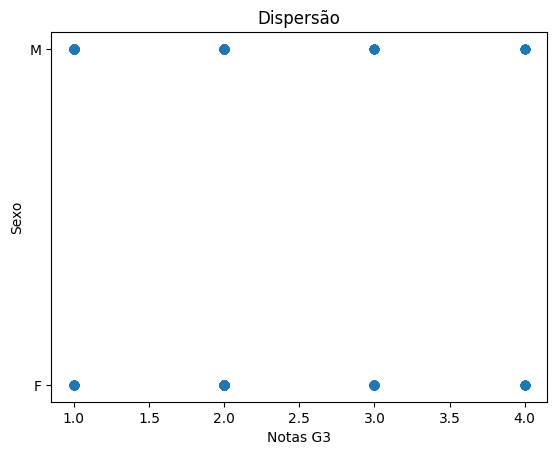

In [176]:
if 'G3' in Notas_mat.columns and 'sex' in Notas_mat.columns:
    plt.scatter(Notas_mat['studytime'], Notas_mat['sex'])
    plt.title('Dispersão entre horas de estudo e as notas')
    plt.xlabel('Notas G3')
    plt.ylabel('Sexo')
    plt.show()

### 10. Relatório final

A partir da análise da base de dados de alunos portugueses e suas notas em matemática, foram encontardos os seguintes insights:


*   Há uma maior dificuldade dos alunos na discipliina, visto que o numero de reprovado é maior que os de excelência, 130 para 100 respectivamnete. Além disso, há mais alunos que obtiveram notas zero, do que nota máxima;
*   As notas com melhor resultados são do sexo masculino;
*   A profissão da mãe de alunos com as melhores notas se diversificam entre: professoras, serviços e outras;

*   Existe ma maior variação negativa entre notas 1 e 2, em relação a nota 2 e 3. Logo, os alunos se esforçam mais entre as avaliações 2 e 3;
*   Por fim, existe uma relação entre as horas de estudo desses alunos com sua nota. Alunos que estudam menos de 2 horas, ou de 2 a 5 horas, possuem notas mais baixas. Aluno que estudam de 5 a 10 houras, possuem as maiores notas. Por fim, alunos que estudam mais de 10 horas, acabam tendo um redimento ainda bom, mais abaixo dos alunos que estudam até 10 horas.


*   Seria interessante a análise por localização, porém, se faz necessário os pesos amostrais.



